In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
cmt=pd.read_csv(r'C:\Users\HP i5\Downloads\Data Analytics Real World Project -Python\1-Youtube Text Data Analysis\GBcomments.csv',error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [10]:
cmt.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [11]:
from textblob import TextBlob

In [23]:
TextBlob('Its more accurate to call it the M+ (1000) be..').sentiment.polarity

0.45000000000000007

In [13]:
cmt.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [14]:
cmt1=cmt.dropna()

In [15]:
cmt1.isna().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [17]:
polarity=[]
for i in cmt1['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [18]:
cmt1['polarity']=polarity

<ipython-input-18-6027f9b29404>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cmt1['polarity']=polarity


In [19]:
cmt1.head()

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.45
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.00
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.00


In [25]:
cmt1_positive = cmt1[cmt1['polarity']==1]

In [28]:
cmt1.shape

(718424, 5)

In [26]:
cmt1_positive.shape

(20400, 5)

In [27]:
cmt1_positive.head()

,video_id,comment_text,likes,replies,polarity
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.0
26,jt2OHQh0HoQ,The best thing to ever happen to iPhone,0,2,1.0
80,jt2OHQh0HoQ,Apple is always awesome \n\nhttps://youtu.be/r...,0,1,1.0
158,YPVcg45W0z4,das a lot of edditing you have done there ... ...,0,0,1.0
175,YPVcg45W0z4,Welcome to the Scandiworld!,0,0,1.0


In [29]:
!pip install wordcloud

In [30]:
from wordcloud import WordCloud,STOPWORDS

In [33]:
stopwords=set(STOPWORDS)

In [34]:
total_cmt=' '.join(cmt1_positive['comment_text'])

In [35]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_cmt)

(-0.5, 999.5, 499.5, -0.5)

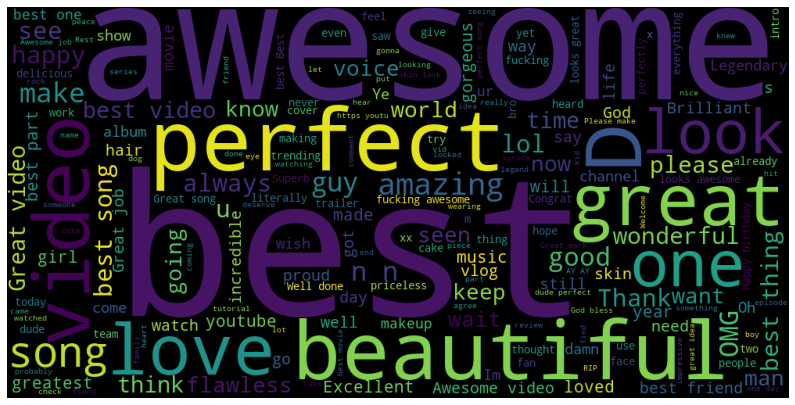

In [38]:
plt.figure(figsize=(14,8))
plt.imshow(wordcloud)
plt.axis('off')

In [39]:
cmt1_negative = cmt1[cmt1['polarity']==-1]

In [40]:
total_cmtn=' '.join(cmt1_negative['comment_text'])

In [41]:
wordcloudn=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_cmtn)

(-0.5, 999.5, 499.5, -0.5)

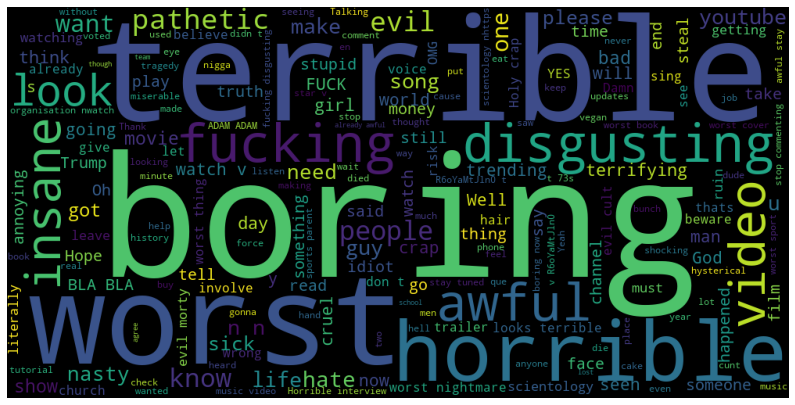

In [42]:
plt.figure(figsize=(14,8))
plt.imshow(wordcloudn)
plt.axis('off')